# Enunciado

Vas a crear un modelo que en base a una altura (en metros) de una persona deberá predecir la del peso (en Kg).

- Crea un nuevo archivo CSV similar al de Celsius/Fahrenheit, solo que este tendrá datos de altura y peso.
- Ingresa al menos 10 registros de altura y su peso correspondiente. Pueden ser datos de tus familiares, amigos, o de internet.
- Realiza el entrenamiento del modelo de regresión lineal, igual que en la lección "Tu primer modelo: regresión lineal".
- Una vez entrenado intenta hacer predicciones, ingresando una altura, y que regrese el peso estimado.
- ¿Funciona bien o no? ¿Por qué crees que es así?

# Resolución

## Datos

### Crear el CSV

Para no complicarme y tener que recolectar datos manualmente o utilizar programas externos (para escribir el archivo), lo haré de la siguiente manera:

- Los datos serán alturas aleatorias y el peso que tendría que tener para sacar un IMC entre 18.5 y 24.9. Intentaré sacarlos de manera programática.
- Asimismo, generaré el archivo CSV mediante código (sin usar `pandas`).
- El resto ya se la saben, pero lo iré comentando sobre la marcha de igual manera.

In [1]:
import random as rd

rd.seed(95)

# Multiplica la altura al cuadrado por el IMC (aleatorio entre 18.5 y 24.9), lo que da como resultado el peso que debería tener la persona para sacar dicho IMC
calcular_peso = lambda altura : round(round(rd.uniform(18.5, 24.9), 2) * altura**2, 2)

In [2]:
with open("personas.csv", "a") as f:
  f.write("altura,peso\n") # escribimos el archivo desde cero, por lo que empezamos con los encabezados
  for _ in range(250): # Sí, 250 entradas. No importa el número que ponga, así que, ¿para qué conformarme con 10?
    altura = round(rd.uniform(1.35, 1.95), 2) # ése será el rango de alturas
    peso = calcular_peso(altura)
    f.write(f"{altura},{peso}\n")

### Revisar

Ahora sí, vamos a usar `pandas` para leerlos y mostrar cierta información de interés.

In [3]:
import pandas as pd

In [4]:
datos = pd.read_csv("personas.csv")

In [5]:
datos.head()

,altura,peso
0,1.81,71.39
1,1.95,83.46
2,1.91,70.48
3,1.65,52.79
4,1.36,35.22


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   altura  250 non-null    float64
 1   peso    250 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


Perfecto. Sé que no se pide, pero antes de continuar, voy a graficar los datos

In [7]:
import seaborn as sb

<Axes: xlabel='altura', ylabel='peso'>

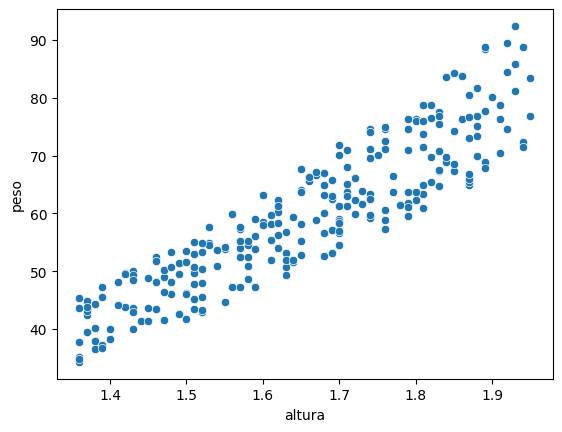

In [8]:
sb.scatterplot(x="altura", y="peso", data=datos)

### Procesar

Ahora toca pasar los datos a arreglos de arreglos. Pero primero, ya que antes generamos 250 entradas y hay más que de sobra, voy a reservar 215 para entrenamiento y 35 para validación, de manera que más adelante puedo evaluar la precisión del modelo con datos que no ha visto antes.

In [9]:
x_entrenamiento = datos["altura"][:215]
y_entrenamiento = datos["peso"][:215]

x_validacion = datos["altura"][215:]
y_validacion = datos["peso"][215:]

In [10]:
x_entrenamiento

0      1.81
1      1.95
2      1.91
3      1.65
4      1.36
       ... 
210    1.79
211    1.76
212    1.70
213    1.59
214    1.54
Name: altura, Length: 215, dtype: float64

La división de los datos ha salido bien. Ahora usamos `.reshape()` para convertir los 4 arreglos en arreglos de arreglos, y ya estarían listos

In [11]:
x_entrenamiento = x_entrenamiento.values.reshape(-1, 1)
y_entrenamiento = y_entrenamiento.values.reshape(-1, 1)

x_validacion = x_validacion.values.reshape(-1, 1)
y_validacion = y_validacion.values.reshape(-1, 1)

In [12]:
print(x_entrenamiento[:5])

[[1.81]
 [1.95]
 [1.91]
 [1.65]
 [1.36]]


## Modelo

### Crear y entrenar

Como bien he mencionado anteriormente, un modelo de regresión lineal está perfecto para éste caso. Lo creamos y entrenamos con los arreglos que reservé para el entrenamiento.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
modelo = LinearRegression()

In [15]:
modelo.fit(x_entrenamiento, y_entrenamiento)

LinearRegression()

### Evaluar

In [16]:
modelo.score(x_validacion, y_validacion)

0.796599188241405

Ya que `.score()` devuelve un valor entre 0 y 1, eso es un 79.67% de precisión aprox. Entiendo que no está realmente mal y se podría considerar aumentar los datos (o modificar la manera en la que se han generado) para experimentar.

### Guardar

Igualmente, es una precisión valorable como para guardar el modelo. Con una búsqueda en Google he encontrado [una página de la documentación de scikit-learn](https://scikit-learn.org/stable/model_persistence.html) que recomienda un método para conservar el modelo usando `joblib`

In [17]:
from joblib import dump, load

ModuleNotFoundError: No module named 'google'

In [ ]:
dump(modelo, 'modelo.joblib')
files.download("modelo.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Cargar

In [ ]:
modeloCargado = load("modelo.joblib")

In [ ]:
modeloCargado.score(x_validacion, y_validacion)

0.796599188241405

La precisión de `modelo` y `modeloCargado` son idénticas, lo que confirma que son el mismo y se puede guardar o cargar sin ningún problema.